In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2,venn2_circles

In [2]:
GWAS_IBI_covered_stat = pd.read_csv('HTNpatient_both_ICI_and_GWAS_Covered_SNPs_v5.csv', index_col=0)

In [3]:
## Table preperation for figure 4a ##

_930_GWAS_SNPs_df = GWAS_IBI_covered_stat.copy()
_930_GWAS_SNPs_df = _930_GWAS_SNPs_df.sort_values('gwasSNP_pvalue') # Sort by GWAS SNPs Pvalue
_930_GWAS_SNPs_df = _930_GWAS_SNPs_df.reset_index()

Unique_GWAS_SNPs_DF = _930_GWAS_SNPs_df.set_index('gwasSNP')
Unique_GWAS_SNPs_DF = Unique_GWAS_SNPs_DF[~Unique_GWAS_SNPs_DF.index.duplicated(keep='first')] # Keep the unique SNPs with corresponding statistics

# Calculate the GWAS patient coverage for figure
list_of_list = []
for i in Unique_GWAS_SNPs_DF.index.tolist():
    pvalue = Unique_GWAS_SNPs_DF.loc[i]['gwasSNP_pvalue']
    patient_cover = _930_GWAS_SNPs_df[(_930_GWAS_SNPs_df['gwasSNP_pvalue'] <= pvalue)].shape[0]
    _all = [i, pvalue, patient_cover]
    list_of_list.append(_all)

pvalue_threshold = pd.DataFrame(list_of_list)
pvalue_threshold.columns = ['SNP', 'p_value', 'Patient_coverage']

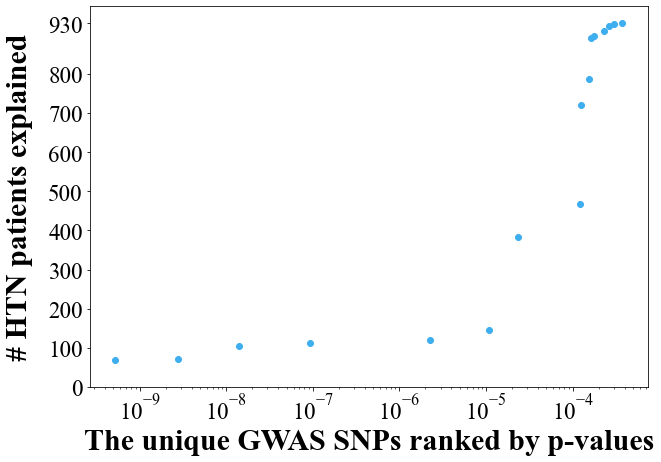

In [4]:
### Figure 4a ##

import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(10,7))
colors = ['#ee3f65', '#3faeee']
ax = plt.scatter(pvalue_threshold['p_value'].tolist(), pvalue_threshold['Patient_coverage'].tolist(),  marker='o', color=colors[1])
labels = [0,100,200,300,400,500,600,700,800,930]
plt.yticks(labels, labels, fontname="Times New Roman", size=23)
plt.ylabel('# HTN patients explained', labelpad=15,  fontname="Times New Roman", size=30,fontweight="bold")
plt.xticks(fontname="Times New Roman", size=23,fontweight="regular")
plt.xlabel('The unique GWAS SNPs ranked by p-values', fontname="Times New Roman", size=30,fontweight="bold")
plt.xscale('log')
#plt.show()
#plt.savefig('manuscript_v2/pvalue_threhold_yaxisreverse.jpg', dpi=300,  bbox_inches = "tight")
#plt.savefig('manuscript_v2/pvalue_threhold_yaxisreverse.eps', format='eps', bbox_inches = "tight")

In [5]:
## Table preperation for figure 4b ##

_930_IBI_SNPs_df = GWAS_IBI_covered_stat.copy()
_930_IBI_SNPs_df = _930_IBI_SNPs_df.sort_values('IBI-SNP_lgM_sGD', ascending=False) # Sort by IBI SNPs Marginal value
_930_IBI_SNPs_df = _930_IBI_SNPs_df.reset_index()

Unique_IBI_SNPs_DF = GWAS_IBI_covered_stat.set_index('IBI-SNP')
Unique_IBI_SNPs_DF = Unique_IBI_SNPs_DF.sort_values('IBI-SNP_lgM_sGD_R')
Unique_IBI_SNPs_DF = Unique_IBI_SNPs_DF[~Unique_IBI_SNPs_DF.index.duplicated(keep='first')] # Keep the unique SNPs with corresponding statistics

# Calculate the IBI patient coverage for figure
list_of_list = []
for i in Unique_IBI_SNPs_DF.index.tolist():
    pvalue = Unique_IBI_SNPs_DF.loc[i]['IBI-SNP_lgM_sGD']
    patient_cover = _930_IBI_SNPs_df[(_930_IBI_SNPs_df['IBI-SNP_lgM_sGD'] >= pvalue)].shape[0]
    _all = [i, pvalue, patient_cover]
    list_of_list.append(_all)

ibi_threshold = pd.DataFrame(list_of_list)
ibi_threshold.columns = ['SNP', 'marginal', 'Patient_coverage']
ibi_threshold['marginal_reverse'] = -1*ibi_threshold['marginal']

Text(0.5, 0, 'The unique IBI SNPs ranked by Ms,r values')

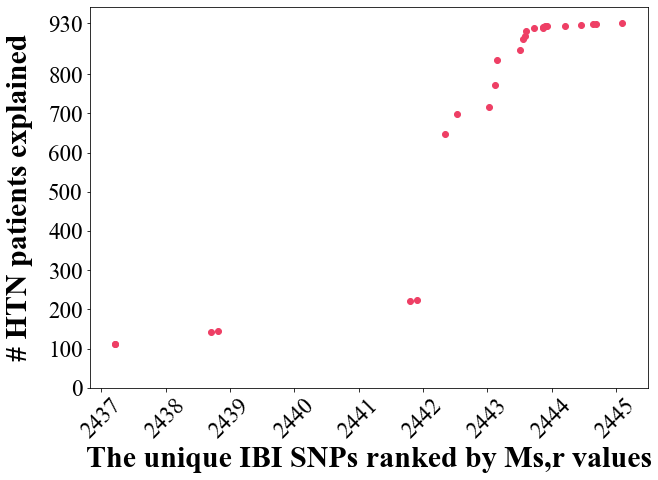

In [6]:
### Figure 4b ##

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,7))
colors = ['#ee3f65', '#3faeee']
ax = plt.scatter(ibi_threshold['marginal_reverse'].tolist(), ibi_threshold['Patient_coverage'].tolist(),  marker='o', color=colors[0])
labels = [0,100,200,300,400,500,600,700,800,930]
plt.yticks(labels, labels, fontname="Times New Roman", size=23)
plt.ylabel('# HTN patients explained', labelpad=15,  fontname="Times New Roman", size=30,fontweight="bold")
plt.xticks(rotation=45, fontname="Times New Roman", size=23,fontweight="regular")
plt.xlabel('The unique IBI SNPs ranked by Ms,r values', fontname="Times New Roman", size=30,fontweight="bold")
#plt.savefig('manuscript_v2/Msr2_threhold_yaxisreverse.jpg', dpi=300,  bbox_inches = "tight")
#plt.savefig('manuscript_v2/Msr2_threhold_yaxisreverse.eps', format='eps', bbox_inches = "tight")

Text(0, 0.5, '# HTN patients explained')

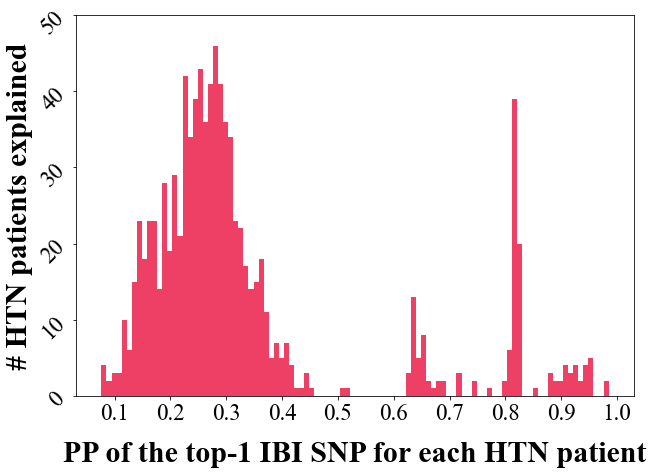

In [7]:
### Figure 4c ##

IBI_SNPs_PP_df = GWAS_IBI_covered_stat.copy()
IBI_SNPs_PP_df = IBI_SNPs_PP_df.sort_values('IBI-SNP_PP') # Sort values by IBI SNPs posterior probability values
IBI_SNPs_PP_df = IBI_SNPs_PP_df.reset_index()

plt.figure(figsize=(10,7))
IBI_SNPs_PP_df['IBI-SNP_PP'].hist(grid=False, bins=100, color=colors[0])
labels = [0,10,20,30,40,50]
label2 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
plt.xticks(label2, label2, fontname="Times New Roman", size=23)
plt.xlabel('PP of the top-1 IBI SNP for each HTN patient',  labelpad=17,  fontname="Times New Roman", size=30,fontweight="bold")
plt.yticks(labels, labels, rotation=45, fontname="Times New Roman", size=23,fontweight="regular")
plt.ylabel('# HTN patients explained', fontname="Times New Roman", size=30,fontweight="bold")
#plt.savefig('manuscript_v2/postprobability_threhold_yaxisreverse_hist100bins.jpg', dpi=300,  bbox_inches = "tight")
#plt.savefig('manuscript_v2/postprobability_threhold_yaxisreverse_hist100bins.eps', format='eps', bbox_inches = "tight")